### Anaphora resolution

In [1]:
# endt20 Bakytbek Bekzat extra questions to get full credit for the laboratory work #5
# What is the difference between lemmatization and stemming
# During word context identification we encounter several forms of the same words giving similar semantics, 
# but spelled differently, which brings for the models some issues in identifying the final context of the words.
# in order to solve this issue. There are two possible ways of solutions. Stemming and lemmatization that return the 
# base form of the word. For instance: singular and plural forms of word - car should return the same output, but for
# the model it would two different words. Or verbs that have different endings depending on the form of the verb that
# is used in different time formats and usage within the sentence and based on morphological structure. So, the word
# be might be encountered in different forms like am, is, are, being and so on and supposed to return the same output
# as "be". In this issue, we have solutions like stemming and lemmatization. Stemming just truncates the words and
# tries to return the output, but it might dilute the meaning of the word, which might be a problem if we want to get
# the most correct context out of the text or sentence. Furthermore to have more precise answers for examples we
# mentioned above like the different forms of word "be" come in handy lemmatization. Lemmatization uses more sophisticated
# approach and takes into account not only truncation, but also vocabulary and morphological analysis of words. As a
# result giving the best output possible like it supposed to be in a form of base or vocabulary state. 

1) Get the pretrained model of FastText from https://fasttext.cc/docs/en/english-vectors.html

2) At the pytorch develop a model, that is a feed forward neural network that consists of three layers, an input layer of size 600, a first layer of size 300, a second layer of 80 and an output layer with two units, all layers have regularization and dropout. The activation function on all layers is ReLU

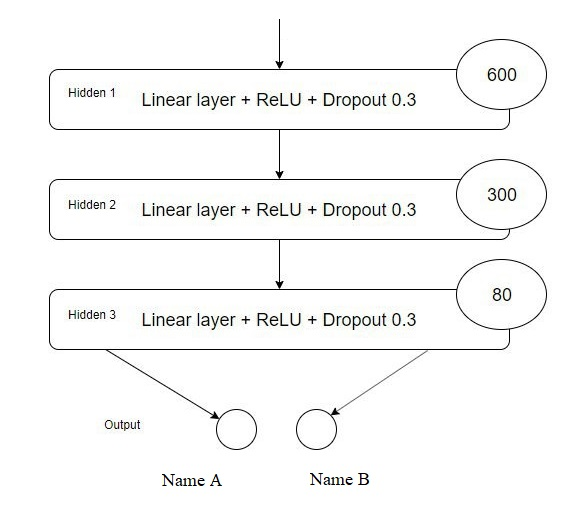

In [2]:
import pandas as pd

In [3]:
df_dev = pd.read_csv('gap-development.tsv',sep='\t')

The task is to identify the target of a pronoun within a text passage. The source text is taken from Wikipedia articles. In the dataset, there are labels of the pronoun and two candidate names to which the pronoun could refer. An algorithm should be capable of deciding whether the pronoun refers to name A, name B, or neither.  
There are the following columns for analysis:
* ID - Unique identifier for an example (Matches to Id in output file format);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Text - Text containing the ambiguous pronoun and two candidate names (about a paragraph in length);
* Pronoun - The target pronoun (text);
* Pronoun-offset The character offset of Pronoun in Text;
* A - The first name candidate (text);
* A-offset - The character offset of name A in Text;
* B - The second name candidate;
* B-offset - The character offset of name B in Text;
* URL - The URL of the source Wikipedia page for the example;


In [4]:
df_dev

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police officer girlf...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of_Teachers_...
1,development-2,"He grew up in Evanston, Illinois the second ol...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_MacKenzie
2,development-3,"He had been reelected to Congress, but resigne...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%A9_Manuel_...
3,development-4,The current members of Crime have also perform...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(band)
4,development-5,Her Santa Fe Opera debut in 2005 was as Nuria ...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica_Rivera
...,...,...,...,...,...,...,...,...,...,...,...
1995,development-1996,"Faye's third husband, Paul Resnick, reported t...",her,433,Nicole,255,False,Faye,328,True,http://en.wikipedia.org/wiki/Faye_Resnick
1996,development-1997,The plot of the film focuses on the life of a ...,her,246,Doris Chu,111,False,Mei,215,True,http://en.wikipedia.org/wiki/Two_Lies
1997,development-1998,Grant played the part in Trevor Nunn's movie a...,she,348,Maria,259,True,Imelda Staunton,266,False,http://en.wikipedia.org/wiki/Sir_Andrew_Aguecheek
1998,development-1999,The fashion house specialised in hand-printed ...,She,284,Helen,145,True,Suzanne Bartsch,208,False,http://en.wikipedia.org/wiki/Helen_David


In [5]:
df_dev.iloc[0]['Text']

"Zoe Telford -- played the police officer girlfriend of Simon, Maggie. Dumped by Simon in the final episode of series 1, after he slept with Jenny, and is not seen again. Phoebe Thomas played Cheryl Cassidy, Pauline's friend and also a year 11 pupil in Simon's class. Dumped her boyfriend following Simon's advice after he wouldn't have sex with her but later realised this was due to him catching crabs off her friend Pauline."

In [6]:
df_val = pd.read_csv('gap-validation.tsv',sep='\t')

In [7]:
df_val

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,validation-1,He admitted making four trips to China and pla...,him,256,Jose de Venecia Jr,208,False,Abalos,241,False,http://en.wikipedia.org/wiki/Commission_on_Ele...
1,validation-2,"Kathleen Nott was born in Camberwell, London. ...",She,185,Ellen,110,False,Kathleen,150,True,http://en.wikipedia.org/wiki/Kathleen_Nott
2,validation-3,"When she returns to her hotel room, a Liberian...",his,435,Jason Scott Lee,383,False,Danny,406,True,http://en.wikipedia.org/wiki/Hawaii_Five-0_(20...
3,validation-4,"On 19 March 2007, during a campaign appearance...",he,333,Reucassel,300,True,Debnam,325,False,http://en.wikipedia.org/wiki/Craig_Reucassel
4,validation-5,"By this time, Karen Blixen had separated from ...",she,427,Finch Hatton,290,False,Beryl Markham,328,True,http://en.wikipedia.org/wiki/Denys_Finch_Hatton
...,...,...,...,...,...,...,...,...,...,...,...
449,validation-450,"He then agrees to name the gargoyle Goldie, af...",He,305,Lucien,252,False,Abel,264,False,http://en.wikipedia.org/wiki/Goldie_(DC_Comics)
450,validation-451,"Disgusted with the family's ``mendacity'', Bri...",she,365,Maggie,242,False,Mae,257,False,http://en.wikipedia.org/wiki/Cat_on_a_Hot_Tin_...
451,validation-452,She manipulates Michael into giving her custod...,she,306,Scarlett,255,False,Alice,291,True,http://en.wikipedia.org/wiki/Michael_Moon_(Eas...
452,validation-453,"On April 4, 1986, Donal Henahan wrote in the N...",her,330,Aida,250,False,Miss Millo,294,True,http://en.wikipedia.org/wiki/Aprile_Millo


"df_dev" dataset pre-trained

In [8]:
import gensim
fasttext = gensim.models.fasttext.FastText.load_fasttext_format('wiki.en.bin')
A_tensor = []
B_tensor = []
p_tensor = []
for i in range(len(df_dev['A'])):
    A_tensor.append(fasttext.wv[df_dev['A'][i]])
    B_tensor.append(fasttext.wv[df_dev['B'][i]])
    p_tensor.append(fasttext.wv[df_dev['Pronoun'][i]])
dataset_with_tensors = pd.DataFrame()
dataset_with_tensors['A'] = A_tensor
dataset_with_tensors['B'] = B_tensor
dataset_with_tensors['Pronoun'] = p_tensor
dataset_with_tensors['A-coref'] = df_dev['A-coref'].replace(True,1)
dataset_with_tensors['B-coref'] = df_dev['B-coref'].replace(True,1)

C:\Users\Bekzat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  


In [9]:
from torch import nn
import numpy as np

In [10]:
import torch
inp = []
for i in range(len(A_tensor)):
    input1 = np.append(A_tensor[i],B_tensor[i])
    input2 = np.append(input1, p_tensor[i])
    inp.append(input2)
X = torch.tensor(inp).float()
print('input size: ', len(X[0]))
print('len of train dataset: ',len(X))
print('The first free raws: ')
print(X[:3])

input size:  900
len of train dataset:  2000
The first free raws: 
tensor([[ 0.2072,  0.0463,  0.1232,  ...,  0.4101,  0.0578,  0.2908],
        [ 0.0793,  0.0274, -0.0651,  ...,  0.0558,  0.4029, -0.8033],
        [-0.4349, -0.2292,  0.0815,  ...,  0.4401, -0.0977,  0.2298]])


In [11]:
dataset_with_tensors.head()

,A,B,Pronoun,A-coref,B-coref
0,"[0.20722698, 0.046324596, 0.123187125, 0.02980...","[0.050630115, 0.079322815, -0.20837106, 0.4176...","[0.23167726, 0.048626047, -0.2783578, 0.310555...",1.0,0.0
1,"[0.07929457, 0.027403368, -0.06506348, -0.0076...","[-0.18771006, -0.15013029, 0.004081186, 0.0881...","[0.013744404, -0.3271882, 0.52612346, 0.560924...",1.0,0.0
2,"[-0.43492344, -0.22918437, 0.08146006, 0.02927...","[-0.10447918, -0.23179889, 0.057727065, -0.066...","[0.104024425, -0.28820887, -0.1581829, 0.20985...",0.0,1.0
3,"[0.08626314, 0.0841154, -0.06387855, 0.2759951...","[0.10059552, 0.1925702, -0.02262189, 0.143873,...","[0.104024425, -0.28820887, -0.1581829, 0.20985...",0.0,1.0
4,"[0.13949117, -0.0039573913, 0.012229018, -0.02...","[0.14959028, 0.36849105, 0.15276578, -0.261143...","[-0.029501453, 0.23555057, -0.20406115, 0.2393...",0.0,1.0


In [12]:
out = []
y1 = dataset_with_tensors['A-coref'].values
y2 = dataset_with_tensors['B-coref'].values
for i in range(len(X)):
    output1 = np.append(y1[i],y2[i])
    out.append(output1)
y = torch.tensor(out).float()
print('output size: ', len(y[0]))
print('len of train dataset: ',len(y))
print('The first free raws: ')
print(y[:3])
#True = 1 
#False = 0

output size:  2
len of train dataset:  2000
The first free raws: 
tensor([[1., 0.],
        [1., 0.],
        [0., 1.]])


In [13]:
input_size = len(X[0])
hidden_sizes = [600,300, 80]
output_size = 2
model = nn.Sequential(
                      nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Dropout(p = 0.3),
                      nn.Linear(hidden_sizes[2], output_size))
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss = 1
loss_arr = []
for i in range(5000):
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            loss_arr.append(loss)
            if (i%100 == 0):
                print(i, loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
print(i, loss.item())

Sequential(
  (0): Linear(in_features=900, out_features=600, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=600, out_features=300, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=300, out_features=80, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=80, out_features=2, bias=True)
)
0 0.547558605670929
100 0.2367868274450302
200 0.11220141500234604
300 0.04247431829571724
400 0.0308095533400774
500 0.025918178260326385
600 0.021441752091050148
700 0.019596440717577934
800 0.01695510931313038
900 0.017279399558901787
1000 0.016020435839891434
1100 0.015745772048830986
1200 0.014932902529835701
1300 0.013752829283475876
1400 0.014086409471929073
1500 0.012642132118344307
1600 0.012471095658838749
1700 0.012037010863423347
1800 0.01137924287468195
1900 0.011648106388747692
2000 0.010925738140940666
2100 0.011144832707941532
2200 0.011133182793855667
2300 0.010556570254266

In [14]:
print(y_pred)

tensor([[ 0.8944,  0.0187],
        [ 0.8795, -0.0034],
        [ 0.0412,  0.8159],
        ...,
        [ 1.0205,  0.0199],
        [ 0.9157,  0.0155],
        [-0.0474,  1.1447]], grad_fn=<AddmmBackward>)


In [15]:
import matplotlib.pyplot as plt
epoch = []
for i in range (len(loss_arr)):
    epoch.append(i)
plt.plot(epoch, loss_arr)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<Figure size 640x480 with 1 Axes>

In [16]:
print(y_pred)

tensor([[ 0.8944,  0.0187],
        [ 0.8795, -0.0034],
        [ 0.0412,  0.8159],
        ...,
        [ 1.0205,  0.0199],
        [ 0.9157,  0.0155],
        [-0.0474,  1.1447]], grad_fn=<AddmmBackward>)


In [17]:
print(y)

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]])


In [18]:
# testing data "df_val"

In [19]:
A_tensor_test = []
B_tensor_test = []
p_tensor_test = []
for i in range(len(df_val['A'])):
    A_tensor_test.append(fasttext.wv[df_val['A'][i]])
    B_tensor_test.append(fasttext.wv[df_val['B'][i]])
    p_tensor_test.append(fasttext.wv[df_val['Pronoun'][i]])

In [20]:
import torch
inp = []
for i in range(len(A_tensor_test)):
    input1 = np.append(A_tensor_test[i],B_tensor_test[i])
    input2 = np.append(input1, p_tensor_test[i])
    inp.append(input2)
X_test = torch.tensor(inp).float()
print('FOR TASTING DATA')
print('input size: ', len(X_test[0]))
print('len of train dataset: ',len(X_test))
print('The first free raws: ')
print(X_test[:3])

FOR TASTING DATA
input size:  900
len of train dataset:  454
The first free raws: 
tensor([[-0.1394,  0.0182,  0.0389,  ...,  0.3287,  0.1988,  0.2779],
        [ 0.1304, -0.0368, -0.0333,  ..., -0.2414, -0.0914, -0.1415],
        [-0.1029, -0.0926, -0.0633,  ...,  0.4401, -0.0977,  0.2298]])


In [21]:
y1 = (df_val['A-coref'].replace(True, 1).values)
y2 = (df_val['B-coref'].replace(True, 1).values)

In [22]:
out = []
for i in range(len(X_test)):
    output1 = np.append(y1[i],y2[i])
    out.append(output1)
y_test = torch.tensor(out).float()
print('output size: ', len(y_test[0]))
print('len of train dataset: ',len(y_test))
print('The first free raws: ')
print(y_test[:3])

output size:  2
len of train dataset:  454
The first free raws: 
tensor([[0., 0.],
        [0., 1.],
        [0., 1.]])


In [23]:
y_test_pred = model(X_test)

In [24]:
y_test_pred_np = (np.round((y_test_pred).detach().numpy() ))**2

accuracy evaluation 

In [25]:
#class1 = false & false
#class2 = false & true
#class3 = true & false
#class4 = true & true

In [26]:
y_test_class = []
for i in range (len(y_test)):
    y_test2 = y_test[i].detach().numpy()
    if (y_test2[0] == 0):
        if (y_test2[1] == 0):
            y_test_class.append('class1')
    if (y_test2[0] == 0):
        if (y_test2[1] >= 1):
            y_test_class.append('class2')
    if (y_test2[0]== 1):
        if (y_test2[1]== 0):
            y_test_class.append('class3')
    if (y_test2[0]>= 1):
        if (y_test2[1] >= 1):
            y_test_class.append('class4')

In [27]:
y_test_pred_class = []
for i in range (len(y_test_pred_np)):
    y_test2 = y_test_pred_np[i]
    if (y_test2[0] == 0):
        if (y_test2[1] == 0):
            y_test_pred_class.append('class1')
    if (y_test2[0] ==0):
        if (y_test2[1] == 1):
            y_test_pred_class.append('class2')
    if (y_test2[0] == 1):
        if (y_test2[1] == 0):
            y_test_pred_class.append('class3')
    if (y_test2[0] == 1):
        if (y_test2[1] == 1):
            y_test_pred_class.append('class4')

In [28]:
from sklearn.metrics import classification_report
clr = classification_report(y_test_class, y_test_pred_class)
print('Classification report for both classes')
print('Firsly I identify classes as both false - class1, falsefrue - class2, truefalse - class3, truetrue -class4')
print(clr)

C:\Users\Bekzat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Classification report for both classes
Firsly I identify classes as both false - class1, falsefrue - class2, truefalse - class3, truetrue -class4
              precision    recall  f1-score   support

      class1       0.12      0.09      0.10        65
      class2       0.50      0.53      0.52       205
      class3       0.49      0.49      0.49       184
      class4       0.00      0.00      0.00         0

    accuracy                           0.45       454
   macro avg       0.28      0.28      0.28       454
weighted avg       0.44      0.45      0.45       454



In [29]:
from sklearn.metrics import classification_report
y_test_np = np.array(y_test)
clr1 = classification_report(y_test_np.T[0], y_test_pred_np.T[0])
print('Classification report for the A output')
print(clr1)

Classification report for the A output
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65       270
         1.0       0.48      0.49      0.49       184

    accuracy                           0.58       454
   macro avg       0.57      0.57      0.57       454
weighted avg       0.58      0.58      0.58       454



In [30]:
from sklearn.metrics import classification_report
clr2 = classification_report(y_test_np.T[1], y_test_pred_np.T[1])
print('Classification report for the B output')
print(clr2)

Classification report for the B output
              precision    recall  f1-score   support

         0.0       0.59      0.57      0.58       249
         1.0       0.50      0.53      0.52       205

    accuracy                           0.55       454
   macro avg       0.55      0.55      0.55       454
weighted avg       0.55      0.55      0.55       454



In [31]:
#accuracy 
#100% - len(t_test)
#x - model_was_right
model_was_right = 0
for i in range(len(y_test_np)):
    if (y_test_np[i][0] == y_test_pred_np[i][0]):
        if (y_test_np[i][1] == y_test_pred_np[i][1]):
            model_was_right = model_was_right + 1
accuracy = 100*model_was_right/(len(y_test_np))
print('Model was right in ', model_was_right, 'from ', len(y_test_np),' observations. So accuracy is ', round(accuracy, 2), '%')

        

Model was right in  204 from  454  observations. So accuracy is  44.93 %
